# Dataset 준비하기

## Download Data
https://www.kaggle.com/ahmedmoorsy/facial-expression

## Train data, Evaluation data로 나누기

In [1]:
import numpy as np
import tqdm
import os

train_x = []
train_y = []
eval_x = []
eval_y = []

csv_path = os.getenv('HOME')+'/aiffel/tfjs_mobile/data/fer2013.csv'

with open(csv_path) as f:
  for line in tqdm.tqdm(f.read().splitlines()[1:]):
    emotion, pixels, usage = line.split(',')
    
    x = np.array(pixels.split(' ')).astype(float).reshape(48, 48, 1) / 255
    y = int(emotion)

    if usage == 'PrivateTest':
      eval_x.append(x)
      eval_y.append(y)
    else:
      train_x.append(x)
      train_y.append(y)

print('train : {}, eval :{}'.format(len(train_x), len(eval_x)))

100%|██████████| 35887/35887 [00:21<00:00, 1667.96it/s]

train : 32298, eval :3589


Angry


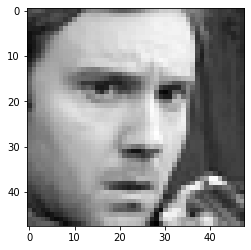

In [2]:
from matplotlib import pyplot as plt

LABELS = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

print(LABELS[train_y[0]])
plt.imshow(train_x[0].reshape([48, 48]), cmap='gray')

In [4]:
import tensorflow as tf
from tensorflow import keras


# model 선언 
model = tf.keras.applications.MobileNetV2(input_shape=(48,48,1), classifier_activation="softmax",
 weights = None, classes =7)
model.summary()

Model: "mobilenetv2_1.00_48"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 48, 48, 1)]  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 49, 49, 1)    0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 24, 24, 32)   288         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 24, 24, 32)   128         Conv1[0][0]                      
________________________________________________________________________________

In [6]:
# model.compile
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

#model.fit
model.fit(np.stack(train_x),
          tf.keras.utils.to_categorical(train_y),
          epochs=100,
          batch_size=512,
          validation_data = (np.stack(eval_x),
                             tf.keras.utils.to_categorical(eval_y)))


Epoch 1/100
64/64 [==============================] - 59s 925ms/step - loss: 1.3836 - categorical_accuracy: 0.4720 - val_loss: 1.8912 - val_categorical_accuracy: 0.1655
Epoch 2/100
64/64 [==============================] - 59s 916ms/step - loss: 1.2901 - categorical_accuracy: 0.5100 - val_loss: 1.8980 - val_categorical_accuracy: 0.1655
Epoch 3/100
64/64 [==============================] - 58s 911ms/step - loss: 1.2099 - categorical_accuracy: 0.5472 - val_loss: 1.9020 - val_categorical_accuracy: 0.1655
Epoch 4/100
64/64 [==============================] - 58s 912ms/step - loss: 1.1636 - categorical_accuracy: 0.5669 - val_loss: 1.9117 - val_categorical_accuracy: 0.1655
Epoch 5/100
64/64 [==============================] - 58s 912ms/step - loss: 1.0898 - categorical_accuracy: 0.5968 - val_loss: 1.9304 - val_categorical_accuracy: 0.1655
Epoch 6/100
64/64 [==============================] - 56s 872ms/step - loss: 1.0331 - categorical_accuracy: 0.6204 - val_loss: 1.9461 - val_categorical_accuracy:

64/64 [==============================] - 55s 858ms/step - loss: 0.1309 - categorical_accuracy: 0.9545 - val_loss: 2.7920 - val_categorical_accuracy: 0.1655
Epoch 50/100
64/64 [==============================] - 55s 857ms/step - loss: 0.1414 - categorical_accuracy: 0.9531 - val_loss: 2.9902 - val_categorical_accuracy: 0.1655
Epoch 51/100
64/64 [==============================] - 55s 857ms/step - loss: 0.1471 - categorical_accuracy: 0.9503 - val_loss: 2.6724 - val_categorical_accuracy: 0.1655
Epoch 52/100
64/64 [==============================] - 55s 857ms/step - loss: 0.1176 - categorical_accuracy: 0.9599 - val_loss: 2.9989 - val_categorical_accuracy: 0.1655
Epoch 53/100
64/64 [==============================] - 55s 857ms/step - loss: 0.0809 - categorical_accuracy: 0.9729 - val_loss: 2.9831 - val_categorical_accuracy: 0.1655
Epoch 54/100
64/64 [==============================] - 55s 856ms/step - loss: 0.1821 - categorical_accuracy: 0.9374 - val_loss: 2.8858 - val_categorical_accuracy: 0.1655

64/64 [==============================] - 55s 857ms/step - loss: 0.1711 - categorical_accuracy: 0.9397 - val_loss: 5.4931 - val_categorical_accuracy: 0.4274
Epoch 98/100
64/64 [==============================] - 55s 857ms/step - loss: 0.1032 - categorical_accuracy: 0.9645 - val_loss: 5.3646 - val_categorical_accuracy: 0.4096
Epoch 99/100
64/64 [==============================] - 55s 855ms/step - loss: 0.0752 - categorical_accuracy: 0.9740 - val_loss: 5.4714 - val_categorical_accuracy: 0.4213
Epoch 100/100
64/64 [==============================] - 55s 856ms/step - loss: 0.1561 - categorical_accuracy: 0.9452 - val_loss: 5.7802 - val_categorical_accuracy: 0.4118


In [7]:
import os
model_path = os.getenv('HOME')+'/aiffel/tfjs_mobile/model.h5'
model.save(model_path)

```python
$ pip install tensorflowjs
$ cd ~/aiffel/tfjs_mobile
$ tensorflowjs_converter --input_format=keras model.h5 model
```

## 웹페이지
https://nr-ai.github.io/face2emoji_practice

## 문제점 및 개선 방안
1. 얼굴 영역이 아니라 전체 사진에 대해 처리를 한다. => face_detection library를 통해 얼굴 사진 부분만 잘라준다. 
2. 얼굴의 다양한 각도를 대비하지 못한다. => 잘라낸 사진이 정면이 되도록 비틀어준다. 얼굴이 정중앙에 위치하도록 위치 조정해준다.
3. 픽셀의 greyscale 값으로 학습하여 학습 로드는 줄어들지만 그만큼 디테일한 정보도 사라진다. => RGB 의 3채널로 학습하여 본다.